<h1><center>Determinants of a Mobile Strategy Game's Success</center></h1>
<body><center>Anna Carandang, Jacqueline Gao, and Mahreen Haider</center></body>

# Table of Contents
1. Introduction
2. Data Collection
3. Data Processing
4. Exploratory Analysis and Data Visualization
5. Analysis, Hypothesis Testing, and Machine Learning
6. Insight and Policy Decision

# 1. Introduction

[Background]


In this tutorial, we will examine numerous factors to see if they are a measure of a mobile strategy game's success. For the purposes of this tutorial, we will measure success with the average user rating and number of ratings.

Possible reading material: https://espeo.eu/blog/best-ways-to-measure-mobile-app-success/

# 2. Data Collection

This step of the data life cycle focuses on gathering data from different sources, such as websites or files. We start by importing the required tools and libraries. Additional information on how to upgrade from pip to pip3 and use it to install the required packages can be found [here](https://help.dreamhost.com/hc/en-us/articles/115000699011-Using-pip3-to-install-Python3-modules). We're using pip3 because it is used to install packages for Python 3, which is used in this tutorial.

### TODO: add more information
Additional reading (2. Data Mining): https://towardsdatascience.com/data-science-life-cycle-101-for-dummies-like-me-e66b47ad8d8f

In [2]:
# Imports required tools and libraries
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Here, we utilize the [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to read the CSV (comma-separated values) file obtained from [Kaggle](https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games) and place the data into a DataFrame called games for later processing and analysis. We print out the first few rows of the resulting DataFrame.

The dataset may be updated in the future, so if you're interested, you can obtain the version of the dataset that we have used [here](https://github.com/jacquelinegao/jacquelinegao.github.io/blob/master/appstore_games.csv).

Special thanks to tristan581 for providing us with the data! 

In [3]:
# Reads CSV file
games = pd.read_csv("appstore_games.csv")

# Prints first 5 rows of DataFrame
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


# 3. Data Processing
This step of the data cycle focuses on cleaning the data to make it readable and prepare it for analysis. We drop the Icon URL, URL, ID, Subtitle, Original Release data, and Current Version Release Date columns from the DataFrame because we aren't using their values. We also standardize the 0 values in the Price column to 0.00.

In [4]:
# Drops unused columns
games.drop(['Icon URL', 'URL','ID','Subtitle','Original Release Date','Current Version Release Date'], axis=1, inplace=True)

# Renames columns to remove whitespace
games = games.rename(columns = {'Average User Rating': 'AverageUserRating', 'User Rating Count': 'UserRatingCount', \
                                'In-app Purchases': 'InAppPurchases', 'Age Rating': 'AgeRating', \
                                'Primary Genre': 'PrimaryGenre'})

# Standardizes 0 values
games.loc[games['Price'] == 0, 'Price'] = 0.00
games.loc[games['Price'] == 0.0, 'Price'] = 0.00

# Changes type of the InAppPurchases column from object to string
games["InAppPurchases"] = games.InAppPurchases.astype(str)

# Prints first few rows of DataFrame
games.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,Size,PrimaryGenre,Genres
0,Sudoku,4.0,3553.0,2.99,nan,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle"
1,Reversi,3.5,284.0,1.99,nan,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board"
2,Morocco,3.0,8376.0,0.00,nan,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy"
3,Sudoku (Free),3.5,190394.0,0.00,nan,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle"
4,Senet Deluxe,3.5,28.0,2.99,nan,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education"


# 4. Exploratory Analysis and Data Visualization

In [5]:
games['Languages'].unique

<bound method Series.unique of 0        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
1                                                       EN
2                                                       EN
3        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
4        DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...
                               ...                        
17002                                                   EN
17003                                                   EN
17004                                                   EN
17005                                                   EN
17006                                               EN, ZH
Name: Languages, Length: 17007, dtype: object>

In [6]:
#games['AgeRating'].unique()

#sns.scatterplot(x='AgeRating', y='Price', data=games)

#test = games[games['Price'] >= 100]
#sns.scatterplot(x='Size', y='AverageUserRating', data=games)

games['InAppPurchases'].unique()

#games[games['Price'] >= 175]

# for index, group in games.groupby('AgeRating'):
#     print(index)
#     sns.scatterplot(x='Price', y='AverageUserRating', data=group)
#     plt.show()

array(['nan', '1.99', '0.99', ...,
       '0.99, 5.99, 12.99, 1.99, 79.99, 26.99',
       '1.99, 9.99, 4.99, 2.99, 0.99', '9.99, 49.99, 3.99'], dtype=object)

## Completely Free Games

In [11]:
free_games = games.copy(deep=True)

# Drops rows with paid games
free_games = free_games[free_games.Price == 0.00]
# Drops rows with in-app purchases
free_games = free_games[free_games.InAppPurchases == 'nan']

free_games.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,Size,PrimaryGenre,Genres
2,Morocco,3.0,8376.0,0.0,nan,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy"
3,Sudoku (Free),3.5,190394.0,0.0,nan,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle"
6,Gravitation,2.5,35.0,0.0,nan,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy"
8,Carte,2.5,44.0,0.0,nan,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment"
9,"""Barrels O' Fun""",2.5,184.0,0.0,nan,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,1466515.0,Games,"Games, Casual, Strategy"


In [32]:
#Counting how many free games have a particular average user rating
free_games['AverageUserRating'].value_counts()

4.5    528
4.0    462
3.5    323
5.0    319
3.0    197
2.5    144
2.0     72
1.5     24
1.0      5
Name: AverageUserRating, dtype: int64

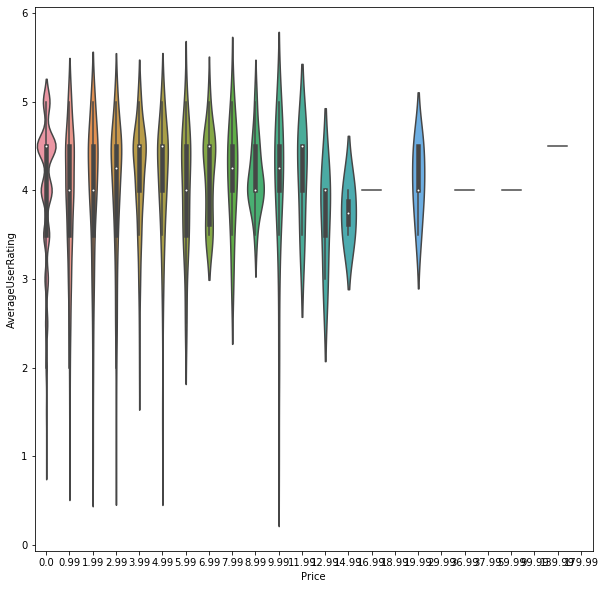

In [31]:
#Not sure where this is supposed to go I just found it here - anna
plt.figure(figsize=(10, 10))
sns.violinplot(x="Price", y="AverageUserRating", data=games)
plt.show()

## Free Games with In-App Purchases (aka microtransactions)

In [34]:
free_and_microtransactions = games.copy(deep=True)

# Drops rows with paid games
free_and_microtransactions = free_and_microtransactions[free_and_microtransactions.Price == 0.00]
# Drops rows without in-app purchases
free_and_microtransactions = free_and_microtransactions[free_and_microtransactions.InAppPurchases != 'nan']

free_and_microtransactions.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,Size,PrimaryGenre,Genres
5,Sudoku - Classic number puzzle,3.0,47.0,0.0,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle"
15,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.0,Games,"Games, Strategy, Board"
16,Awele/Oware - Mancala HD,3.0,112.0,0.0,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.0,Games,"Games, Strategy, Board"
18,Catcha Mouse,3.5,95971.0,0.0,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,"Meme, Inc",4+,EN,26820692.0,Games,"Games, Puzzle, Strategy"
19,"Cool Sudoku, Jigsaw, Killer",3.5,357.0,0.0,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,4+,EN,52236288.0,Games,"Games, Strategy, Puzzle, Entertainment"


In [35]:
#Counting how many free with microtransaction games have a particular average user rating
free_and_microtransactions['AverageUserRating'].value_counts()

4.5    1895
4.0     951
5.0     530
3.5     435
3.0     230
2.5     124
2.0      64
1.5      22
Name: AverageUserRating, dtype: int64

## Paid Games without Microtransactions

In [8]:
paid_games = games.copy(deep=True)

# Drops rows with free games
paid_games = paid_games[paid_games.Price != 0.00]
# Drops rows with in-app purchases
paid_games = paid_games[paid_games.InAppPurchases == 'nan']

paid_games.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,Size,PrimaryGenre,Genres
0,Sudoku,4.0,3553.0,2.99,nan,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle"
1,Reversi,3.5,284.0,1.99,nan,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board"
4,Senet Deluxe,3.5,28.0,2.99,nan,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education"
7,Colony,2.5,125.0,0.99,nan,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,64333824.0,Games,"Games, Strategy, Board"
13,Marple,3.5,989.0,0.99,nan,"AWARDED ""BEST PUZZLER"" IN MACWORLD\'S ""THE BES...",Mikko Kankainen,4+,EN,3643392.0,Games,"Games, Puzzle, Strategy"


## Paid Games with Microtransactions

In [9]:
paid_and_microtransactions = games.copy(deep=True)

# Drops rows with free games
paid_and_microtransactions = paid_and_microtransactions[paid_and_microtransactions.Price != 0.00]
# Drops rows without in-app purchases
paid_and_microtransactions = paid_and_microtransactions[paid_and_microtransactions.InAppPurchases != 'nan']

paid_and_microtransactions.head()

,Name,AverageUserRating,UserRatingCount,Price,InAppPurchases,Description,Developer,AgeRating,Languages,Size,PrimaryGenre,Genres
26,Fieldrunners,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99",OVERVIEW\n\nThe invasion begins! Pint sized s...,"Subatomic Studios, LLC",9+,EN,75041792.0,Games,"Games, Entertainment, Action, Strategy"
59,Wedding Dash Deluxe,4.5,17056.0,0.99,"0.0, 0.99, 5.99, 0.99, 0.99, 0.99, 0.99, 0.99,...",* Play the most romantic Dash game! With over ...,Glu Games Inc,4+,EN,55803904.0,Games,"Games, Strategy, Action, Entertainment"
70,Slay,3.0,4885.0,3.99,"9.99, 9.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99...",Slay is a simple to learn game of strategy and...,"""Sean O'Connor""",9+,EN,59016192.0,Games,"Games, Board, Strategy"
91,Pocket Tanks Deluxe,4.5,5543.0,4.99,"0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99...","""The Ultimate One-on-One Artillery Game"" \u201...","Blitwise Productions, LLC",9+,EN,39997440.0,Games,"Games, Family, Strategy, Entertainment"
102,Boxed In,3.5,93235.0,0.99,"0.99, 0.99, 0.99, 1.99, 0.99, 2.99, 4.99, 0.99...",Ready to try one of the best puzzle games in t...,Dennis Mengelt,4+,EN,259371008.0,Games,"Games, Strategy, Entertainment, Puzzle"


# 5. Analysis, Hypothesis Testing, and Machine Learning